In [1]:
from openfermion.chem import MolecularData

# Set parameters to make a simple molecule.
diatomic_bond_length = .7414
geometry = [('H', (0., 0., 0.)), ('H', (0., 0., diatomic_bond_length))]
basis = 'sto-3g'
multiplicity = 1
charge = 0
description = str(diatomic_bond_length)

# Make molecule and print out a few interesting facts about it.
molecule = MolecularData(geometry, basis, multiplicity,
                         charge, description)
print('Molecule has automatically generated name {}'.format(
    molecule.name))
print('Information about this molecule would be saved at:\n{}\n'.format(
    molecule.filename))
print('This molecule has {} atoms and {} electrons.'.format(
    molecule.n_atoms, molecule.n_electrons))
for atom, atomic_number in zip(molecule.atoms, molecule.protons):
    print('Contains {} atom, which has {} protons.'.format(
        atom, atomic_number))

Molecule has automatically generated name H2_sto-3g_singlet_0.7414
Information about this molecule would be saved at:
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/openfermion/testing/data/H2_sto-3g_singlet_0.7414

This molecule has 2 atoms and 2 electrons.
Contains H atom, which has 1 protons.
Contains H atom, which has 1 protons.


0.3

At bond length of 0.30000000000000004 angstrom, molecular hydrogen has:
Hartree-Fock energy of -0.59382776458494 Hartree.
MP2 energy of -0.5997818888874376 Hartree.
FCI energy of -0.6018037168352988 Hartree.
Nuclear repulsion energy between protons is 1.7639240286333335 Hartree.
Spatial orbital 0 has energy of -0.8028666187118976 Hartree.
Spatial orbital 1 has energy of 1.368938795250223 Hartree.
0.4

At bond length of 0.4 angstrom, molecular hydrogen has:
Hartree-Fock energy of -0.904361397713845 Hartree.
MP2 energy of -0.9114367296997896 Hartree.
FCI energy of -0.9141497082141279 Hartree.
Nuclear repulsion energy between protons is 1.322943021475 Hartree.
Spatial orbital 0 has energy of -0.7452125332909346 Hartree.
Spatial orbital 1 has energy of 1.167416395038123 Hartree.
0.5

At bond length of 0.5 angstrom, molecular hydrogen has:
Hartree-Fock energy of -1.0429962765072203 Hartree.
MP2 energy of -1.0514858618835026 Hartree.
FCI energy of -1.055159796496619 Hartree.
Nuclear rep

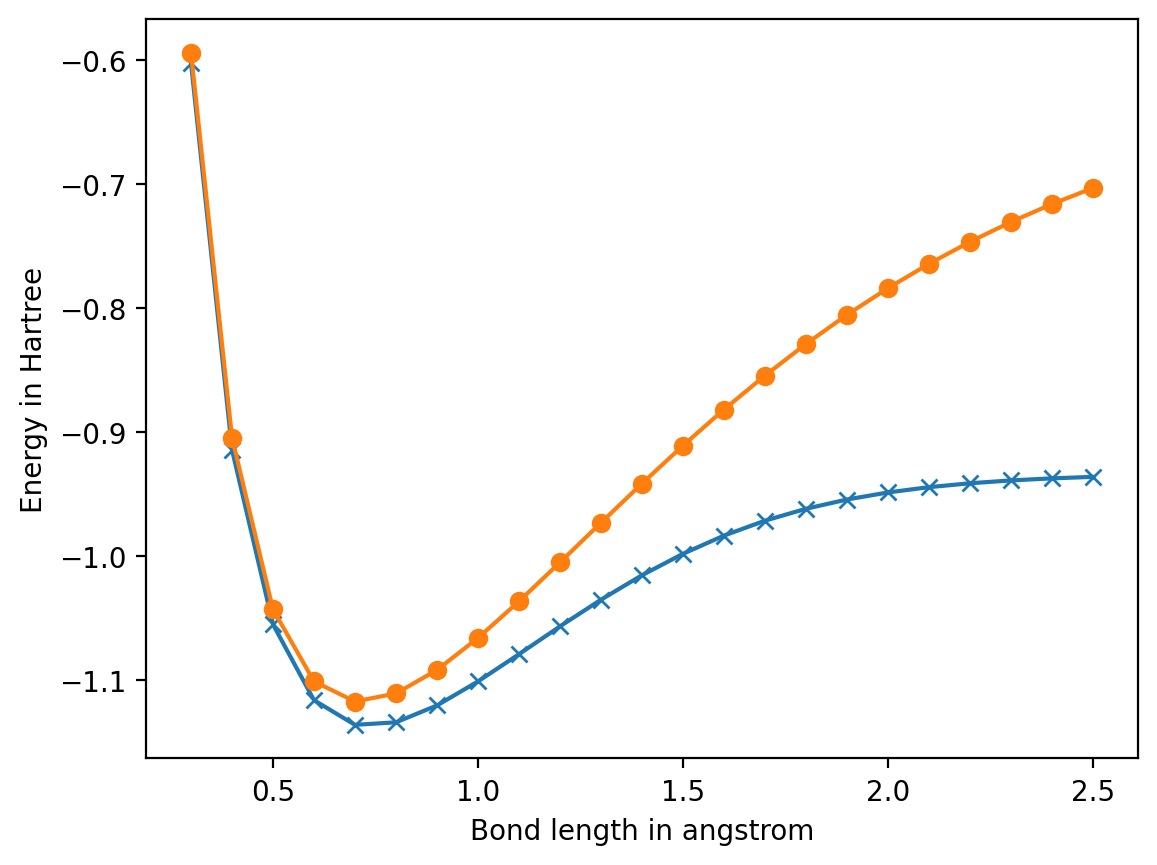

In [2]:
# Set molecule parameters.
basis = 'sto-3g'
multiplicity = 1
bond_length_interval = 0.1
n_points = 25

# Generate molecule at different bond lengths.
hf_energies = []
fci_energies = []
bond_lengths = []
for point in range(3, n_points + 1):
    bond_length = bond_length_interval * point
    bond_lengths += [bond_length]
    description = str(round(bond_length,2))
    print(description)
    geometry = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    molecule = MolecularData(
        geometry, basis, multiplicity, description=description)

    # Load data.
    molecule.load()

    # Print out some results of calculation.
    print('\nAt bond length of {} angstrom, molecular hydrogen has:'.format(
        bond_length))
    print('Hartree-Fock energy of {} Hartree.'.format(molecule.hf_energy))
    print('MP2 energy of {} Hartree.'.format(molecule.mp2_energy))
    print('FCI energy of {} Hartree.'.format(molecule.fci_energy))
    print('Nuclear repulsion energy between protons is {} Hartree.'.format(
        molecule.nuclear_repulsion))
    for orbital in range(molecule.n_orbitals):
        print('Spatial orbital {} has energy of {} Hartree.'.format(
            orbital, molecule.orbital_energies[orbital]))
    hf_energies += [molecule.hf_energy]
    fci_energies += [molecule.fci_energy]

# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies, 'x-')
plt.plot(bond_lengths, hf_energies, 'o-')
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.show()